In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

: 

**Create a DataFrame**

In [ ]:
dataframe = pd.read_csv("/content/diabetes.csv")

In [ ]:
dataframe.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
dataframe.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
dataframe.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


**Missing values in dataset**



In [ ]:
dataframe.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
dataframe.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1




*   Data Imputation of 0's in every feature
*   Size of the data



In [ ]:
dataframe.shape

(768, 9)



*   Target column is [0,1] (Binary Classification task)


**As the traget column is provided therefore it is supervised machine        learning algo**



In [ ]:
dataframe.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


**Applying EDA for feature selection**


*   Heatmap




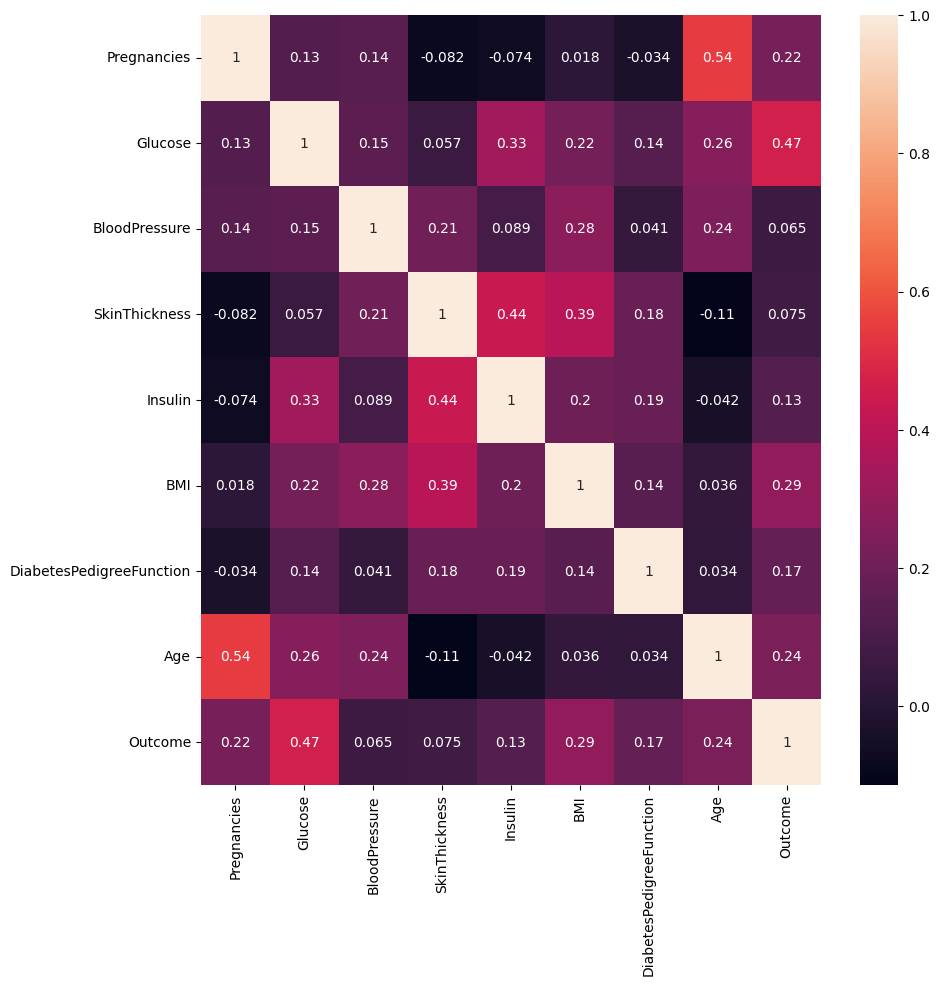

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.heatmap(dataframe.corr(),annot=True)
plt.show()

**Descriptive statistics of the given data**


*   types of distributions
*   why median is more robust to outliers








In [ ]:
dataframe.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Data Imputation**

*   data imputation via mean and median
*   Mean -> for symmetric data i.e normal distribution  (numeric data)

*   Median -> for skewed data (numeric data)
*   Categorical data -> Mode





/tmp/ipython-input-309471209.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe.Pregnancies)


<Axes: xlabel='Pregnancies', ylabel='Density'>

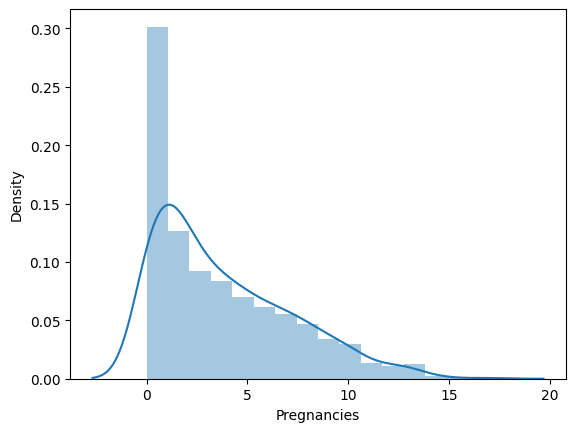

In [ ]:
sns.distplot(dataframe.Pregnancies)

/tmp/ipython-input-1584626736.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe.BloodPressure)


<Axes: xlabel='BloodPressure', ylabel='Density'>

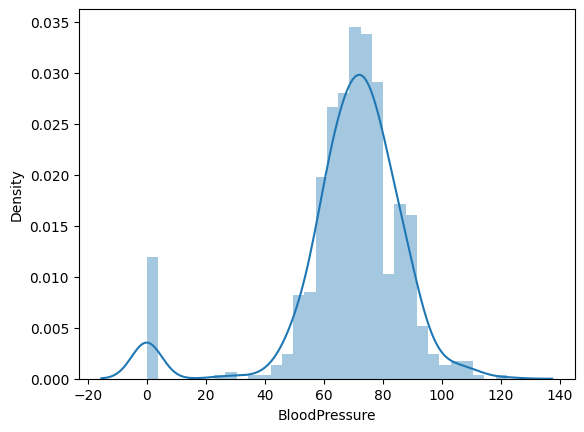

In [ ]:
sns.distplot(dataframe.BloodPressure)

/tmp/ipython-input-1144645211.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe.Insulin)


<Axes: xlabel='Insulin', ylabel='Density'>

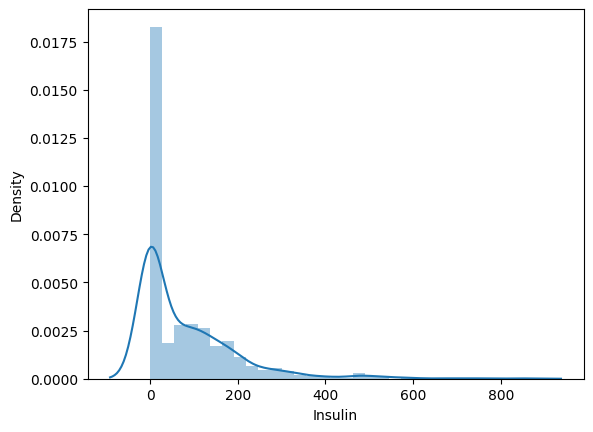

In [ ]:
sns.distplot(dataframe.Insulin)

/tmp/ipython-input-2691430987.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe.Age)


<Axes: xlabel='Age', ylabel='Density'>

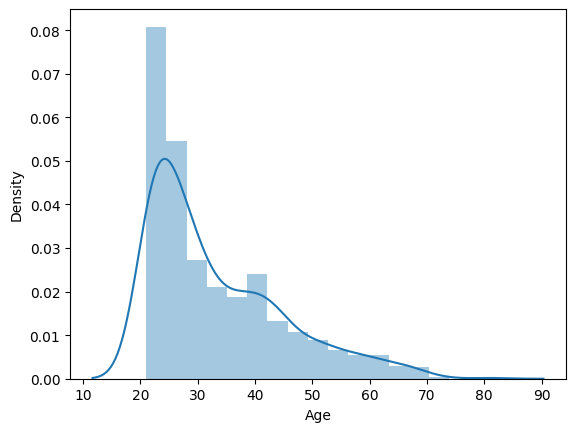

In [ ]:
sns.distplot(dataframe.Age)

/tmp/ipython-input-2642758734.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe.DiabetesPedigreeFunction)


<Axes: xlabel='DiabetesPedigreeFunction', ylabel='Density'>

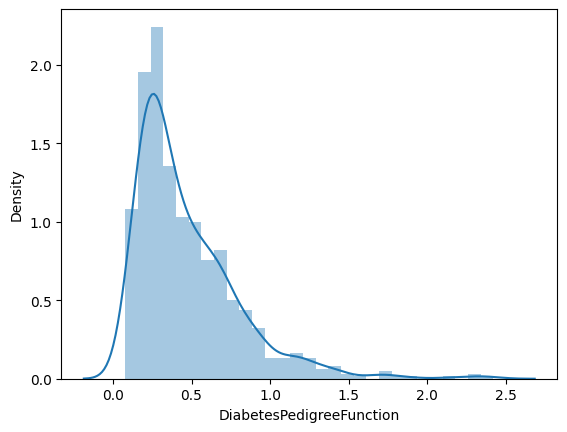

In [ ]:
sns.distplot(dataframe.DiabetesPedigreeFunction)

/tmp/ipython-input-2520980793.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe.BMI)


<Axes: xlabel='BMI', ylabel='Density'>

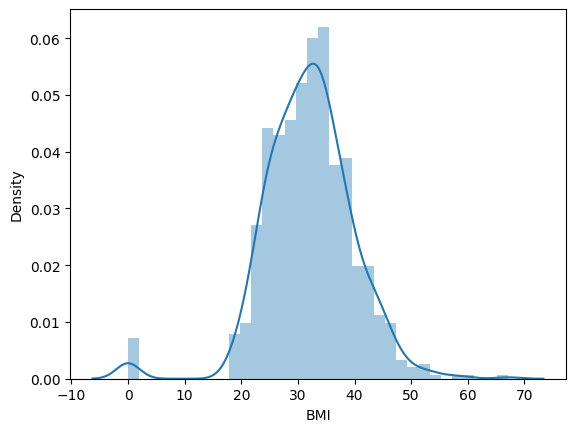

In [ ]:
sns.distplot(dataframe.BMI)

/tmp/ipython-input-3861253045.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe.SkinThickness)


<Axes: xlabel='SkinThickness', ylabel='Density'>

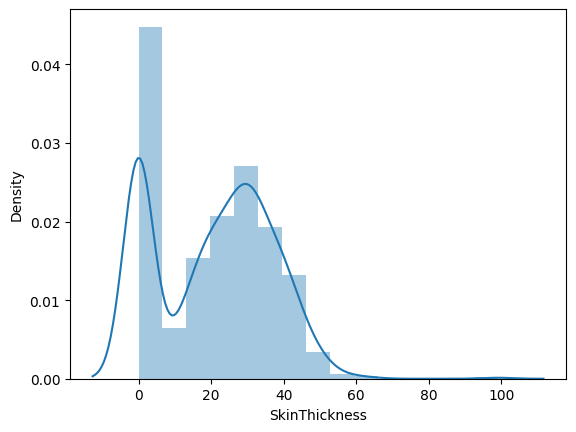

In [ ]:
sns.distplot(dataframe.SkinThickness)

/tmp/ipython-input-2230432677.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe.Glucose)


<Axes: xlabel='Glucose', ylabel='Density'>

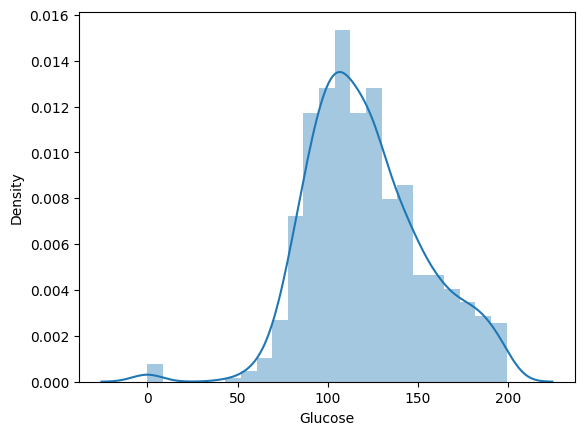

In [ ]:
sns.distplot(dataframe.Glucose)

In [ ]:
dataframe.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
## Insulin -> Right Skewed distribution
dataframe['Insulin'] = dataframe['Insulin'].replace(0,dataframe['Insulin'].median())
dataframe['Pregnancies'] = dataframe['Pregnancies'].replace(0,dataframe['Pregnancies'].median())
dataframe['Glucose'] = dataframe['Glucose'].replace(0,dataframe['Glucose'].mean())
dataframe['BloodPressure'] = dataframe['BloodPressure'].replace(0,dataframe['BloodPressure'].mean())
dataframe['SkinThickness'] = dataframe['SkinThickness'].replace(0,dataframe['SkinThickness'].median())
dataframe['BMI'] = dataframe['BMI'].replace(0,dataframe['BMI'].median())
dataframe['DiabetesPedigreeFunction'] = dataframe['DiabetesPedigreeFunction'].replace(0,dataframe['DiabetesPedigreeFunction'].median())
dataframe['Age'] = dataframe['Age'].replace(0,dataframe['Age'].median())

In [ ]:
dataframe.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.000000,35,30.5,33.6,0.627,50,1
1,1,85.0,66.000000,29,30.5,26.6,0.351,31,0
2,8,183.0,64.000000,23,30.5,23.3,0.672,32,1
3,1,89.0,66.000000,23,94.0,28.1,0.167,21,0
4,3,137.0,40.000000,35,168.0,43.1,2.288,33,1
5,5,116.0,74.000000,23,30.5,25.6,0.201,30,0
6,3,78.0,50.000000,32,88.0,31.0,0.248,26,1
7,10,115.0,69.105469,23,30.5,35.3,0.134,29,0
8,2,197.0,70.000000,45,543.0,30.5,0.158,53,1
9,8,125.0,96.000000,23,30.5,32.0,0.232,54,1


**Outlier Detection**

In [ ]:
#x -> input feature y-> target value
x= dataframe.drop(columns = 'Outcome', axis =1)
y = dataframe['Outcome']



*   **Outlier detection -> Box plot**

<Axes: >

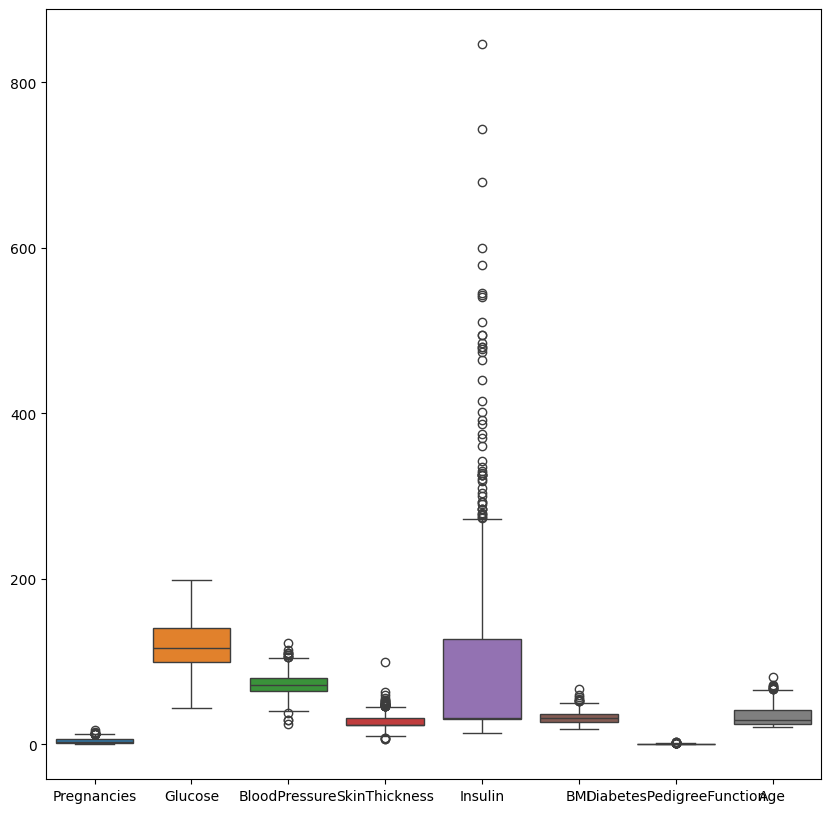

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(data=x, ax=ax)

In [ ]:
x.shape

(768, 8)

In [ ]:
from numpy._core.defchararray import lower
cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
for col in cols:
    Q1= x[col].quantile(0.25)
    Q3= x[col].quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1-1.5*IQR
    upper_bound = Q3+1.5*IQR
    mask = (x[col] >=lower_bound) & (x[col] <= upper_bound)


In [ ]:
x_outliers_removed = x[mask]
y_outliers_removed = y[mask]

In [ ]:
x_outliers_removed.shape

(759, 8)

**Standardization**

*   Standard normal form -> where mean = 0 and standard deviation = 1



In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_outliers_removed)

<Axes: >

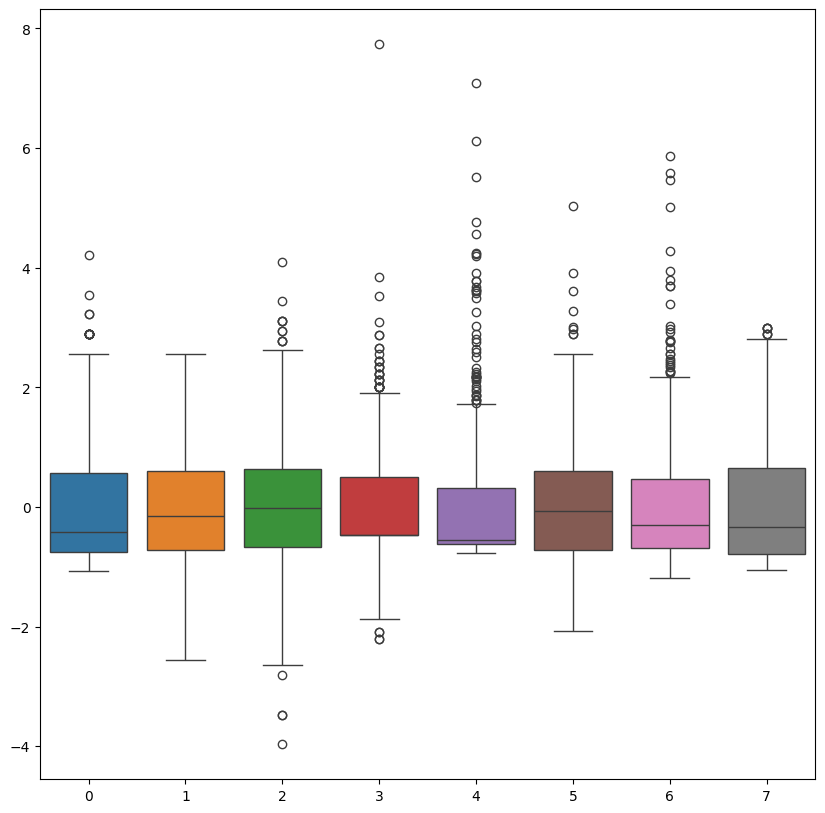

In [ ]:
fig , ax = plt.subplots(figsize=(10,10))
sns.boxplot(data=x_scaled, ax=ax)


In [ ]:
type(x_scaled)

numpy.ndarray

In [ ]:
x_scaled = pd.DataFrame(x_scaled , columns = cols)
x_scaled.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02
mean,1.029772e-16,-3.978665e-17,-3.042508e-17,-1.509552e-16,-4.329724e-17,-2.410603e-16,4.914821e-17,1.591466e-16
std,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00
min,-1.079800e+00,-2.558042e+00,-3.968588e+00,-2.200901e+00,-7.684941e-01,-2.081055e+00,-1.183313e+00,-1.062953e+00
25%,-7.491956e-01,-7.286101e-01,-6.755847e-01,-4.729631e-01,-6.126688e-01,-7.125969e-01,-6.852739e-01,-7.928253e-01
50%,-4.185912e-01,-1.517621e-01,-1.698412e-02,-4.729631e-01,-5.607270e-01,-7.204226e-02,-3.045975e-01,-3.426125e-01
75%,5.732217e-01,6.063810e-01,6.416165e-01,4.990017e-01,3.222827e-01,5.976285e-01,4.627740e-01,6.478556e-01
max,4.209869e+00,2.551183e+00,4.099270e+00,7.734740e+00,7.088876e+00,5.037837e+00,5.864467e+00,2.988962e+00


<Axes: >

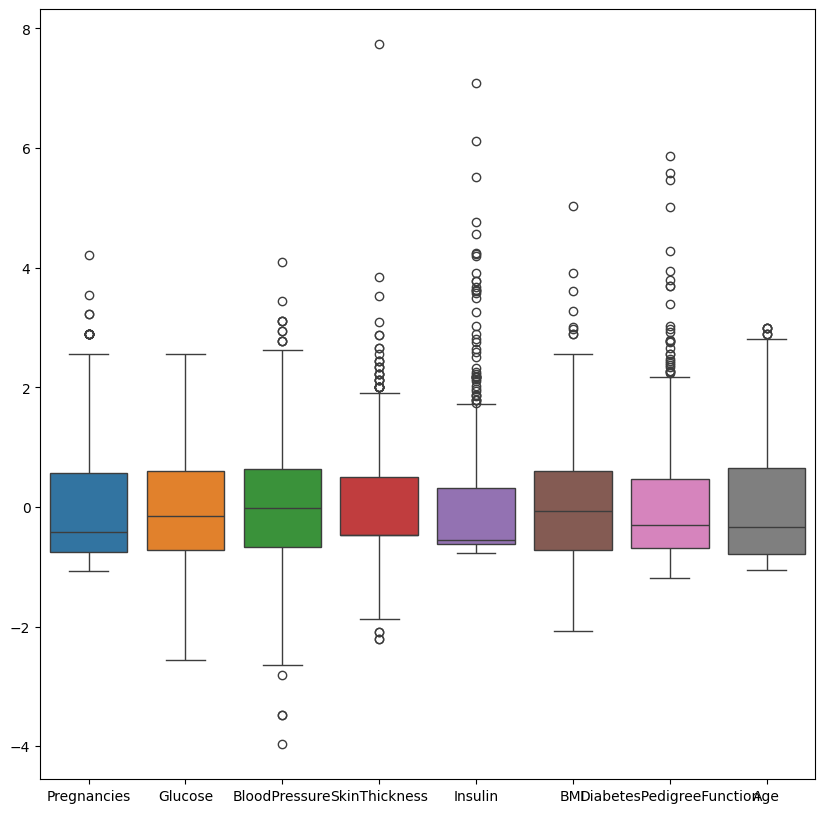

In [ ]:
fig , ax = plt.subplots(figsize=(10,10))
sns.boxplot(data=x_scaled, ax=ax)



*   Handling imbalanced data




In [ ]:
y_outliers_removed.value_counts()

,count
Outcome,
0,493
1,266


In [ ]:
dataframe.shape

(768, 9)

In [ ]:
x_scaled.shape

(759, 8)

**Approach 2 to remove outliers(quantile)**

In [ ]:
q= x_scaled['Insulin'].quantile(.95)
mask = x_scaled['Insulin'] < q


In [ ]:
dataNew = x_scaled[mask]
y_outliers_removed = y_outliers_removed[mask.values]

In [ ]:
dataNew.shape

(721, 8)

<Axes: >

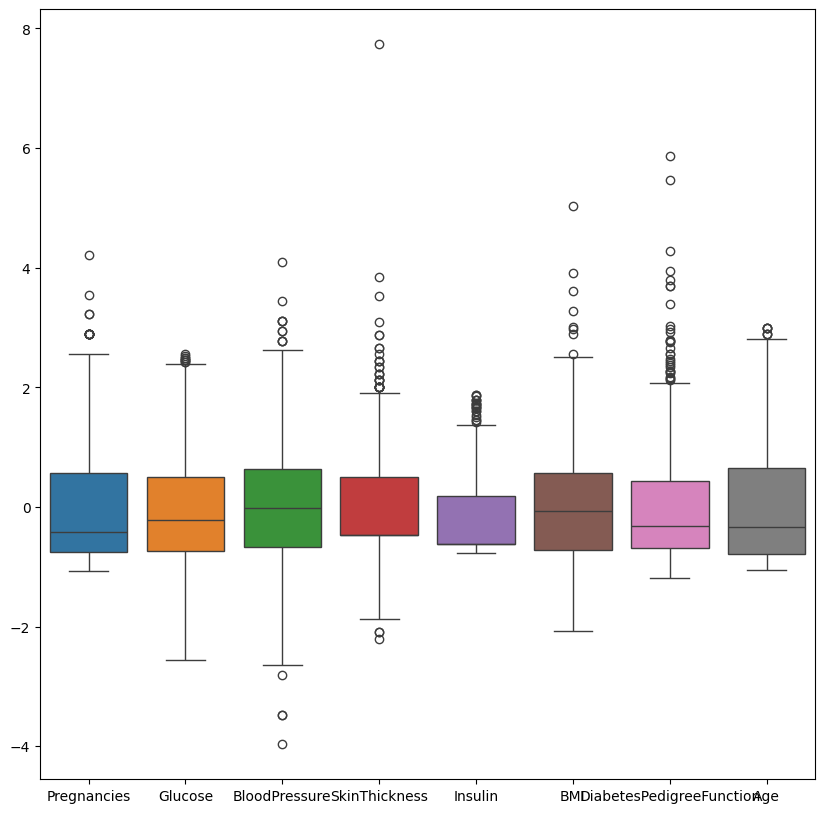

In [ ]:
fig , ax = plt.subplots(figsize=(10,10))
sns.boxplot(data= dataNew, ax=ax)

**Model Training**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(dataNew , y_outliers_removed, test_size=0.33, random_state=42)

In [ ]:
x_train.shape

(483, 8)

In [ ]:
x_test.shape

(238, 8)

**Data Imbalancing**

*   Oversampling  : minority class and increase the no of majority class
*   Undersampling : majority class and descrese the no of minority

*   SMOTE : synthetic data and increse the no of samples to the majority class




In [ ]:
y_train.value_counts()

,count
Outcome,
0,318
1,165


**SMOTE technique**

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

#check resampled class distribution
print("\nResampled Class Distribution:")
print(pd.Series(y_train_resampled).value_counts())


Resampled Class Distribution:
Outcome
0    318
1    318
Name: count, dtype: int64


In [ ]:
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression()
classification.fit(x_train_resampled,y_train_resampled)

LogisticRegression()

**Model Predictions**

In [ ]:
y_prediction = classification.predict(x_test)
print(y_prediction)

[0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0
 0 1 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0
 0 0 1 1 1 1 1 0 1 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1 1
 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1
 1 0 0 0 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0
 1 1 1 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0
 0 0 1 0 1 1 0 0 1 0 0 1 1 1 1 1]


**Model Evaluation**

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_prediction)

0.7478991596638656

Healthcare : Recall is very important metric

In [ ]:
from sklearn.metrics import classification_report
target_names = ['Non diabetic' , 'diabetic']
print(classification_report(y_test,y_prediction , target_names=target_names))


              precision    recall  f1-score   support

Non diabetic       0.85      0.76      0.80       159
    diabetic       0.60      0.72      0.66        79

    accuracy                           0.75       238
   macro avg       0.72      0.74      0.73       238
weighted avg       0.76      0.75      0.75       238



**model saving**

In [ ]:
import pickle
pickle.dump(classification,open('classification_model.pkl','wb'))